

# Project: Investigate a Dataset - [TMDb Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>The TMDb Movies dataset is a dataset containing over 10,000 movies collected from [The Movie Database(TMDb)](https://www.themoviedb.org) with various features regarding this movies with which we will use to generate useful insights such as feautures that determine popularity of movies, the profits, losses, revenues, budget and their correlations.
The dataset contains the following <a href="#Columns-and-its-description"> columns and its descriptions</a>




## Columns and its description
- id - Identification Number.
- imdb_id - IMDb Identification Number.
- popularity - A numeric quantity specifying the movie popularity.
- budget - The budget of the movie.
- revenue - The revenue generated by the movie.
- original_title - The title of the movie before translation or adaptation.
- cast - The name of lead and supporting actors separated by "|".
- homepage - The link to the homepage of the movie.
- director - Director of the movie.
- tagline - A catchprase describing the movie.
- keywords - The keywords or tags related to the movie.
- overview - A brief description/summary of the movie.
- runtime - The running time of the movie in minutes.
- genre - The genre of the movie i.e Action, Comedy, Romance, Thriller etc separated by "|".
- production_companies - The production compan(y/of the movie.
- release_date - The date on which the movie was released.
- vote_count- The number of person that voted the movie.
- vote_average - The average ratings the movie recieved.
- release_year - The year the movie was released.
- budget_adj - Movie Budget including 2010 inflnation.
- revenue_adj - Movie Revenue including 2010 inflnation.

### Question(s) for Analysis
1. Do movies with higher budget get better popularity?
2. Which genres are most popular?
3. Which year has the highest number of movies released ?
4. Which genre has the highest count of movies released?
5. What features are associated with high revenue movies ?


In [1]:
# Importing necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties of the Dataset


In [3]:
#loading the movie dataset and printing the first 5 columns
tmov=pd.read_csv('tmdb-movies.csv')
tmov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#printing dimensions of tmdb dataset
print(tmov.shape)

(10866, 21)


> The dataset contains 10,866 rows and 21 columns.
> Exploring the data further,lets display a concise information about the dataset

In [5]:
tmov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

for better understing of columns information,see above <a href="#Columns-and-its-description"> columns and its descriptions</a>

In [6]:
#descriptive statistics for each column 
tmov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above table, we know the maximum,minimum,mean of various columns,e.g The maximum popularity is 32.985763 while the minimum is 0.000065

Lets check for 
- null values
- duplicates
- unique values
- columns correlations
- columns distributions

In [7]:
# inspecting for null values
tmov.isnull().sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

observation:homepage,tagline,keywords,production_companies,cast,director,genres,imdb_id and overview all contain null values

In [8]:
#inspecting for duplicate values
sum(tmov.duplicated())

1

In [9]:
#inspecting for unique values across columns
tmov.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

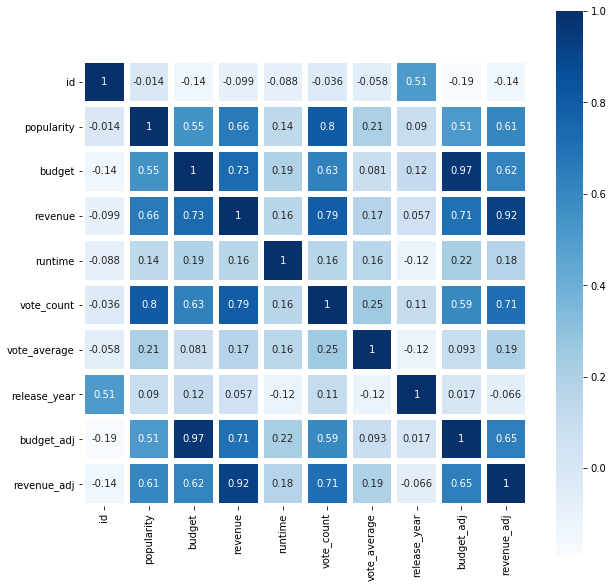

In [10]:
# Visualizing the correlation matrix of the different colums in our dataset
fig,hm=plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm=sns.heatmap(tmov.corr(),cmap="Blues",square=True,linewidth=5, annot=True);

From the above matrix,figures closest to 1 indicate strong positive correlation while negative values indicate the columns are negatively correlated.

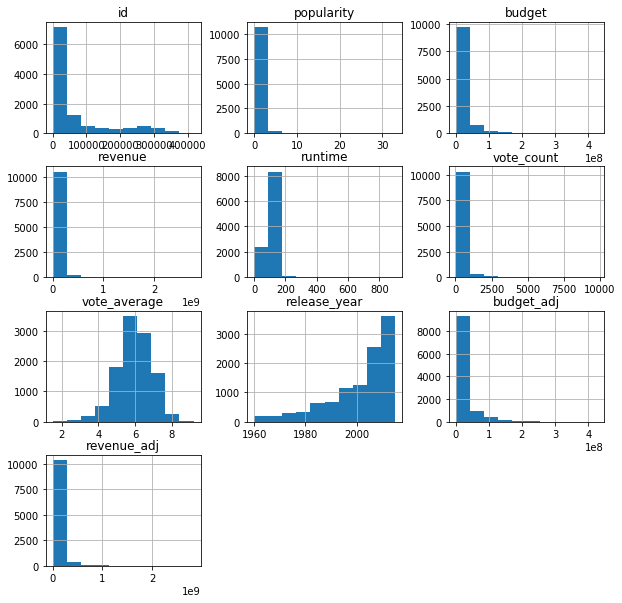

In [11]:
# visualizing the columns distributions
tmov.hist(figsize=(10,10));


### Data Cleaning
In this stage,i will be executing the following;
* Dropping columns not necessary for analysis
* Dropping duplicate values
* Dealing with missing values
* Changing datatype where necessary(e.g-release date column)
* Changing hybrid data input to single input

 

#### 1. Dropping unnecessary columns

In [12]:
#using pandas drop function
tmov.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','keywords','production_companies'],axis=1,inplace=True)
tmov.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### 2. Dropping duplicates

In [13]:
#To drop the 1 no duplicate row observed in the data wrangling section,
dup=tmov.drop_duplicates(inplace=True)

In [14]:
shape=tmov.shape
print("The shape of the dataset after dropping unwanted column and removing duplicates is {}".format(shape))

The shape of the dataset after dropping unwanted column and removing duplicates is (10865, 13)


#### 3. Dealing with missing values

In [15]:
tmov.isnull().sum().sort_values(ascending=False)

cast              76
director          44
genres            23
release_year       0
vote_average       0
vote_count         0
release_date       0
runtime            0
original_title     0
revenue            0
budget             0
popularity         0
id                 0
dtype: int64

In [16]:
#Given the size of the dataset, will drop null values for cast,director and genres columns
tmov.dropna(inplace=True)

In [17]:
#checking for any null values
tmov.isnull().sum().sort_values(ascending=False)

release_year      0
vote_average      0
vote_count        0
release_date      0
genres            0
runtime           0
director          0
cast              0
original_title    0
revenue           0
budget            0
popularity        0
id                0
dtype: int64

#### 4. Ensuring appropriate datatypes

In [18]:
tmov.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [19]:
#changing the release date datatype to datetime
tmov['release_date']=pd.to_datetime(tmov['release_date'])

In [20]:
#checking 
tmov.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [21]:
type(tmov['genres'][0])

str

#### 5. Cleaning genres column

The genre column contains various genres separated by "|", using the split finction to give each genre its individual row

In [22]:
tmov.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [23]:
# split the column genre by separator
tmov['genres']= tmov.genres.str.split('|')

In [24]:
tmov['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10731, dtype: object

In [25]:
# using the explode function to give each genre its row
tmov_m=tmov.explode('genres')
tmov_m.tail(20)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
10856,20277,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,93,Drama,2066-02-16,14,5.7,1966
10856,20277,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,93,Family,2066-02-16,14,5.7,1966
10857,5921,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Henry Hathaway,128,Action,2066-06-10,10,5.9,1966
10857,5921,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Henry Hathaway,128,Western,2066-06-10,10,5.9,1966
10858,31918,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,126,Comedy,2066-05-25,11,5.5,1966
10858,31918,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,126,War,2066-05-25,11,5.5,1966
10859,20620,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Mystery,2066-10-05,22,6.6,1966
10859,20620,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Science Fiction,2066-10-05,22,6.6,1966
10859,20620,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Thriller,2066-10-05,22,6.6,1966
10859,20620,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,100,Drama,2066-10-05,22,6.6,1966


In [26]:
g=tmov_m['genres'].nunique()
print('We have {} unique genres'.format(g))

We have 20 unique genres


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Do movies with higher budget get better popularity?

In [27]:
# To answer this question,i will create a new dataframe for budget column != 0
tmov_budg=tmov_m[tmov_m['budget']!=0].copy()

In [28]:
#create two category for budget using the median
tmov_budg.budget.median()

20000000.0

In [29]:
High_budget_movies=tmov_budg.query('budget >= 20000000.0') #movies with budget greater than median

Low_budget_movies=tmov_budg.query('budget < 20000000.0') #movies with budget less than median

In [30]:
samples_count=tmov_budg.shape[0]
samples_count== High_budget_movies['budget'].count()+ Low_budget_movies['budget'].count()

True

In [31]:
#next step is to get the mean popularity and compare for both budget groups
High_Budget=High_budget_movies.popularity.mean()
Low_Budget=Low_budget_movies.popularity.mean()

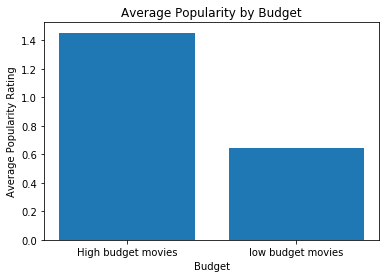

In [32]:
# Plot a bar chart to reflect mean values for both groups
locations = [1, 2]
heights = [High_Budget, Low_Budget]
labels = ['High budget movies', 'low budget movies']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Budget')
plt.xlabel('Budget')
plt.ylabel('Average Popularity Rating');

### Observation
From the above chart,we could say High budget movies are more popular, this can be attributed to higher awareness/marketing expense compared to low budget movies

### Research Question 2  -Which genres are most popular?

In [33]:
# Using a copy of the original dataframe tmov_m and groupby finction()
tmov_pop=tmov_m.copy()
pop_gen=tmov_pop.groupby(['genres'])['popularity'].mean().reset_index()

In [34]:
pop_gen.head()

,genres,popularity
0,Action,0.929040
1,Adventure,1.158480
2,Animation,0.885913
3,Comedy,0.594795
4,Crime,0.745331


In [35]:
pop_gen_sorted=pop_gen.sort_values('popularity')

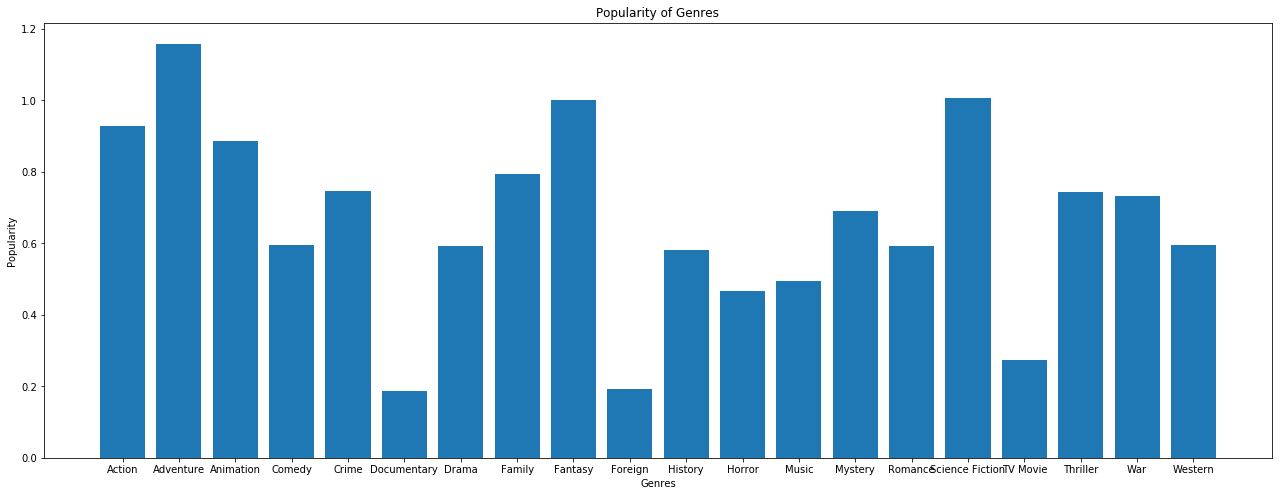

In [36]:
plt.subplots(figsize=(22,8))
plt.bar(pop_gen_sorted['genres'],pop_gen_sorted['popularity'])
plt.title('Popularity of Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity');

Observation: The most popular genre over the years is **Adventure**

### Research Question 3  - Which year has the highest number of movies released ?

In [37]:
# To answer this question, will use the groupby and count function
rel_mov=tmov_m.groupby('release_year').count()['id']

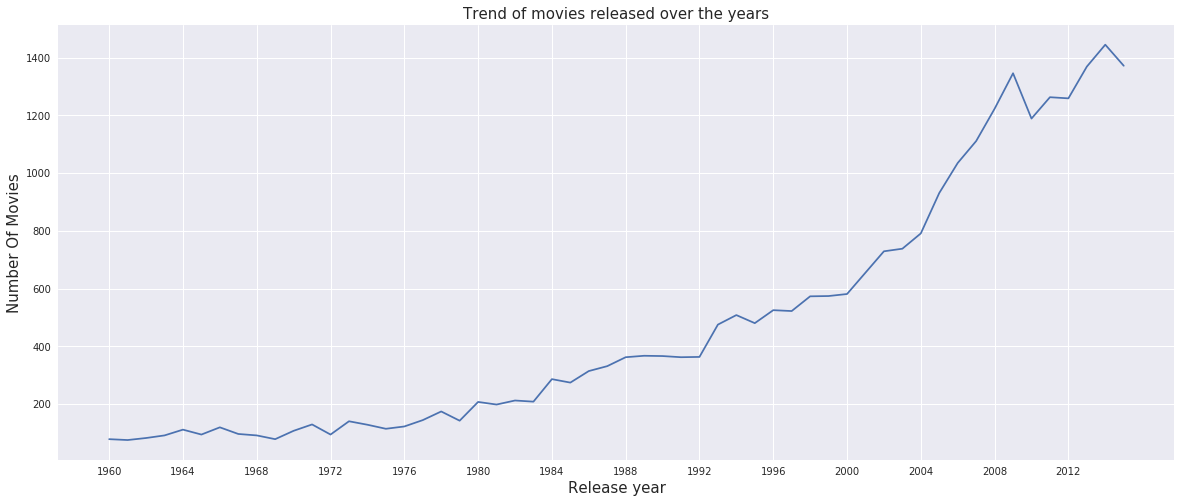

In [39]:
rel_mov.plot(xticks = np.arange(1960,2016,4))
sns.set(rc={'figure.figsize':(20,8)})
plt.title("Trend of movies released over the years",fontsize = 15)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15);

Observation: From the plot above,we can conclude that year 2014 year has the highest release of movies (1445) followed by year 2015 (1372) and year 2013 (1369).

### Research Question 4  - Which genre has the highest count of movies released?

In [40]:
# To answer this question, will use the groupby and count function
gen_mov=tmov_m.groupby('genres').count()['id']

In [41]:
gen_mov.head(10)

genres
Action         2376
Adventure      1465
Animation       664
Comedy         3775
Crime          1353
Documentary     470
Drama          4746
Family         1214
Fantasy         908
Foreign         184
Name: id, dtype: int64

In [42]:
gen_mov_sorted=gen_mov.sort_values()

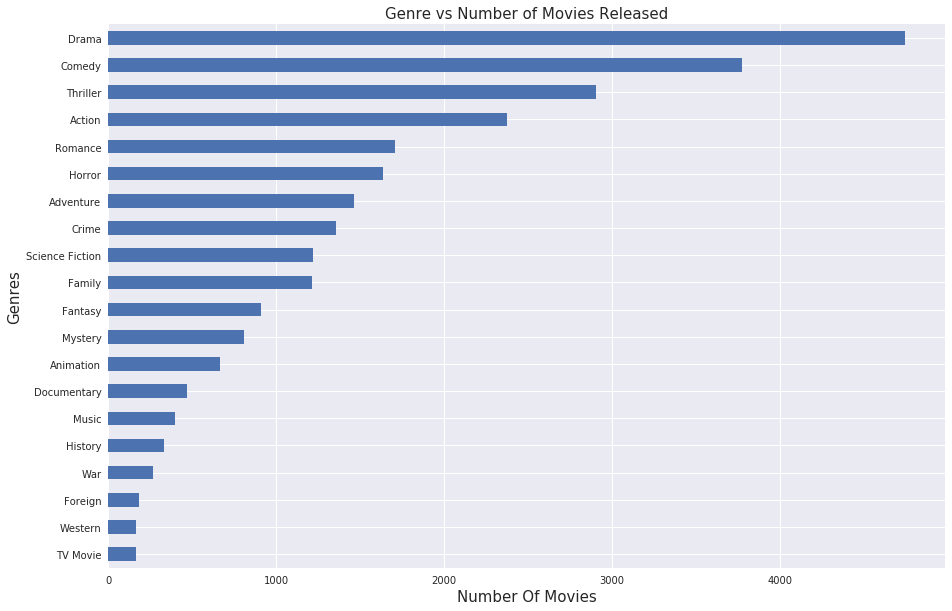

In [43]:
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
gen_mov_sorted.plot(kind='barh',figsize=(15,10))
plt.title("Genre vs Number of Movies Released",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15);

Observation: from the above bar chart, the genre with the highest number of movies released is **Action**, followed by **Comedy** and then **Thriller**

### Research Question 5  -What features are associated with high revenue movies ?

In [44]:
# To answer this question, i will use scatter plots
tmov_m1=tmov_m[tmov_m['revenue']!=0]
tmov_m2=tmov_m1[tmov_m1['budget']!=0]  # the new dataframe has no zeros in the adjusted budget and revenue columns.
tmov_m2['profit']= tmov_m2.revenue-tmov_m2.budget
tmov_m2.corr()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
id,1.000000,0.205898,0.007078,0.022228,-0.033027,0.131098,0.017882,0.475232,0.023975
popularity,0.205898,1.000000,0.443153,0.616056,0.209704,0.769579,0.324335,0.189948,0.596622
budget,0.007078,0.443153,1.000000,0.679284,0.245218,0.567217,0.040128,0.306925,0.517349
revenue,0.022228,0.616056,0.679284,1.000000,0.245288,0.762819,0.245308,0.165425,0.979459
runtime,-0.033027,0.209704,0.245218,0.245288,1.000000,0.275186,0.339506,-0.117776,0.218653
vote_count,0.131098,0.769579,0.567217,0.762819,0.275186,1.000000,0.403349,0.231856,0.733674
vote_average,0.017882,0.324335,0.040128,0.245308,0.339506,0.403349,1.000000,-0.124584,0.275029
release_year,0.475232,0.189948,0.306925,0.165425,-0.117776,0.231856,-0.124584,1.000000,0.108570
profit,0.023975,0.596622,0.517349,0.979459,0.218653,0.733674,0.275029,0.108570,1.000000


In [45]:
#group the genre
tmov_m2=tmov_m2.groupby('genres',as_index=False).agg({'budget':'sum','revenue':'sum','profit':'sum','popularity':'mean'})

In [46]:
tmov_m2= tmov_m2.sort_values(by='revenue',ascending=False)
tmov_m2

,genres,budget,revenue,profit,popularity
0,Action,61237880460,169886215114,108648334654,1.567116
1,Adventure,52384245998,163500596287,111116350289,1.867693
3,Comedy,44957919603,132172056333,87214136730,1.012958
6,Drama,49250304629,130507076351,81256771722,1.002834
17,Thriller,44899698604,117679503931,72779805327,1.259835
8,Fantasy,28004091035,86420717216,58416626181,1.754315
7,Family,26553641134,86340257365,59786616231,1.459043
15,Science Fiction,29057157068,85081292714,56024135646,1.873294
14,Romance,18188468254,57182921352,38994453098,0.956101
4,Crime,21506267460,54777153159,33270885699,1.123961


Strong Positive Correlation


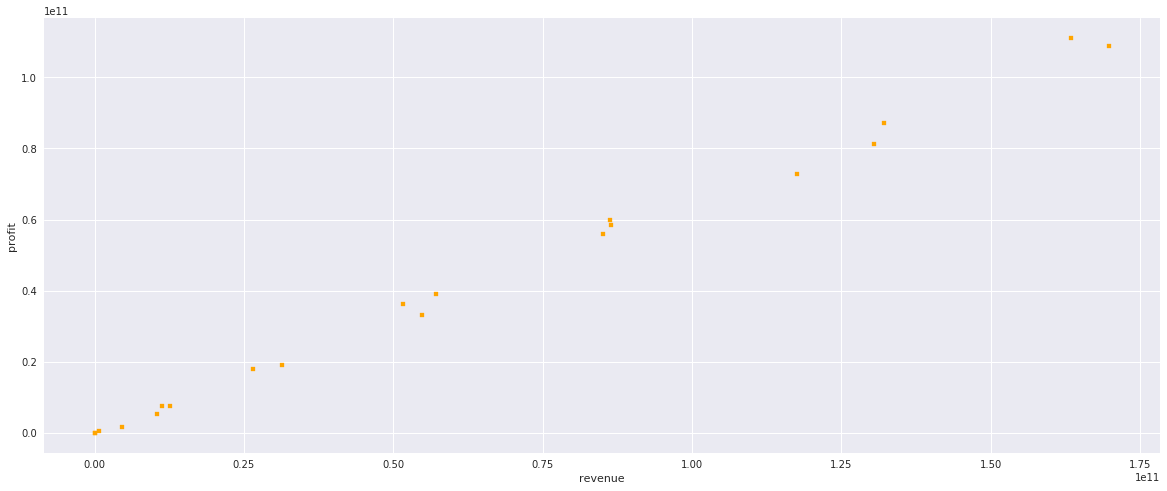

In [47]:
def scatter_plot(arg1,arg2):
    tmov_m2.plot(x=arg1,y=arg2,kind='scatter',color="orange",marker='s');
    
    
    
scatter_plot('revenue','profit')
print("Strong Positive Correlation")

Strong Positive Correlation


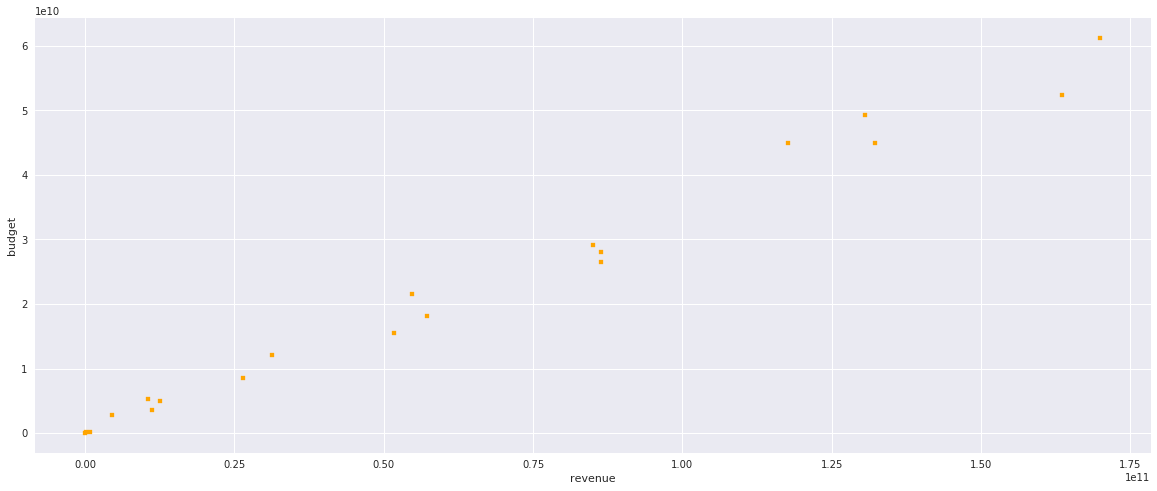

In [48]:
scatter_plot('revenue','budget')
print("Strong Positive Correlation")

No Correlation


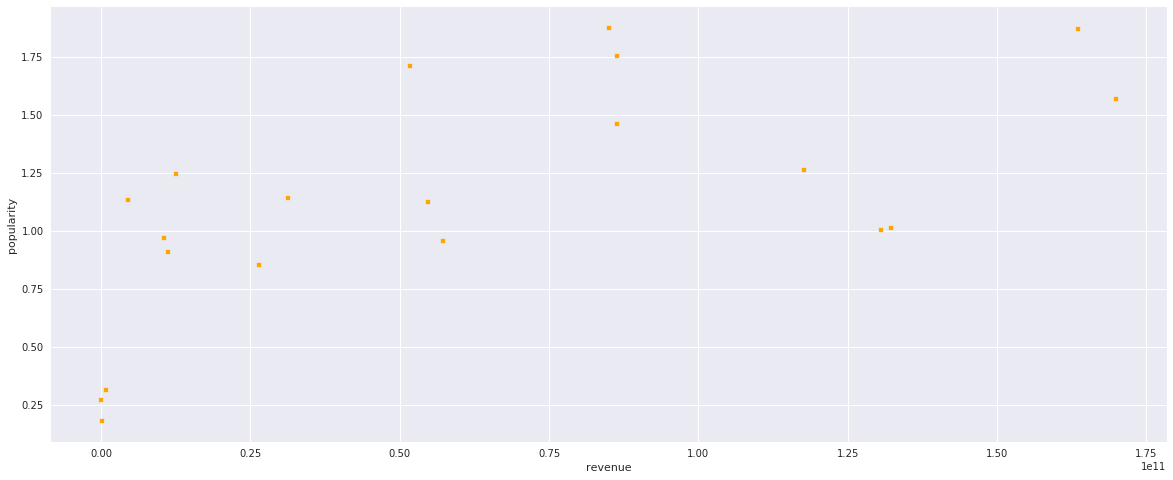

In [49]:
scatter_plot('revenue','popularity')
print("No Correlation")

<a id='conclusions'></a>
## Conclusions
From the above EDA, The following are the answers to the question in the introduction section
1. Movies with higher budget tends to have better popularity
2. The 3 most popular genres are Adventure,science fiction and fantasy
3. The year 2014 year has the highest release of movies (1445) followed by year 2015 (1372) and year 2013 (1369).
4. The genre with the highest number of movies released is Action, followed by Comedy and then Thriller
5. The scatter plots indicates the movies with higher revenues are associated with higher budget and high profits

## Limitations of the dataset:
1. Many columns had missing data
2. The budget and revenue columns had 50% rows with zero values as input
3. Each movie had multiple genres,movie genre classification being based on the main genre would have provided a better analysis.

## References
- online documentations of pandas,matplotlib,seaborn
- Stackoverflow discussion platform
- Youtube video on markdown links

## Submitting your Project 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])